In [1]:
import tensorflow as tf

In [ ]:
# 重点掌握tf的api, 以及规则

### 常量

In [4]:
# python中有没有常量, Python中没有常量. python中一切都是变量. 
# tensorflow中有常量
# 常量就是一定赋值, 值就不能变动.
a = tf.constant(1, dtype=tf.float32) 

In [5]:
a

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [6]:
# 常量不能修改值, 没有assign方法
a.assign()

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [7]:
# 一个数字, 我们叫做标量, scalar 
# 定义个常量矩阵
a = tf.constant([[1, 2, 3], [4, 5, 6]])
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [8]:
# 拿到常量内部的值
a.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
# tensorflow的tensor和numpy中的ndarray很像. 甚至可以互相转化. 他们的属性, api很多类似. 
a[0]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [10]:
a[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [5, 6]])>

In [11]:
# numpy中的routines(常规)函数
import numpy as np

In [ ]:
np.eye()

In [ ]:
tf.eye()

In [15]:
np.ones((2, 3, 1, 4))[..., 1:3]

array([[[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]],


       [[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]]])

In [13]:
tf.ones((2, 3, 1, 4))[:, :, :, 1:3]

<tf.Tensor: shape=(2, 3, 1, 2), dtype=float32, numpy=
array([[[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]],


       [[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]]], dtype=float32)>

In [14]:
tf.ones((2, 3, 1, 4))[..., 1:3]

<tf.Tensor: shape=(2, 3, 1, 2), dtype=float32, numpy=
array([[[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]],


       [[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]]], dtype=float32)>

In [16]:
# 返回了一个新的tensor
a + 1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 4],
       [5, 6, 7]])>

In [17]:
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [19]:
# 常量不能修改内部的值. 
a[0, 1] = 3

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [21]:
a = tf.constant('abcd')

In [23]:
tf.strings.length(a)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [24]:
tf.strings.length(a, unit='UTF8_CHAR')

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [25]:
t = tf.constant(['cafe', 'coffee', '咖啡'])
t

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'cafe', b'coffee', b'\xe5\x92\x96\xe5\x95\xa1'], dtype=object)>

In [26]:
tf.strings.length(t)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 6, 6])>

In [27]:
tf.strings.length(t, unit='UTF8_CHAR')

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 6, 2])>

In [28]:
tf.strings.unicode_decode(t, 'UTF8')

<tf.RaggedTensor [[99, 97, 102, 101], [99, 111, 102, 102, 101, 101], [21654, 21857]]>

### 变量

In [50]:
# Variable, 内部的值可以变化. 变量一般用来定义神经网络里面需要学习的参数. 
v = tf.Variable([[1, 2, 3], [4, 5, 6]], name='v', validate_shape=False)

In [31]:
a

<tf.Tensor: shape=(), dtype=string, numpy=b'abcd'>

In [33]:
v

<tf.Variable 'v:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [34]:
v.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
# 返回的用变量的值创建的常量tensor
v.value()

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [40]:
# 不可以赋值成其他形状
v.assign([1, 2, 3])

ValueError: Cannot assign value to variable ' v:0': Shape mismatch.The variable shape (2, 3), and the assigned value shape (3,) are incompatible.

In [42]:
v  = v.assign(v * 2) # v = v * 2

In [44]:
v.numpy()

array([[ 4,  8, 12],
       [16, 20, 24]])

In [46]:
v.value()

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 4,  8, 12],
       [16, 20, 24]])>

In [49]:
v[0, 1] = 18

TypeError: '_UnreadVariable' object does not support item assignment

In [51]:
v

<tf.Variable 'v:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [52]:
v[0, 1] = 18

TypeError: 'ResourceVariable' object does not support item assignment

In [53]:
# 变量的赋值, 只能通过assign方法去赋值. 
v[0, 1].assign(18)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 1, 18,  3],
       [ 4,  5,  6]])>

### tensorflow的运算

In [55]:
# +-*/ 矩阵乘法 
# 有两种写法, 一种就是使用数学符号, 一种是使用tensorflow提供的api
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [56]:
a + b # 2 + 3

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [57]:
a - b

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [61]:
tf.add(a, b)
tf.subtract(a, b)
tf.multiply(a, b)
tf.divide(a, b)

<tf.Tensor: shape=(), dtype=float64, numpy=0.6666666666666666>

In [62]:
a = tf.constant(np.random.randint(0, 10, size=(3, 4)))
b = tf.constant(np.random.randint(0, 10, size=(4, 5)))

In [63]:
# matrix multiply
tf.matmul(a, b)

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[91, 63, 54, 80, 58],
       [96, 49, 61, 86, 80],
       [47, 40, 39, 79, 41]])>

In [64]:
a @ b

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[91, 63, 54, 80, 58],
       [96, 49, 61, 86, 80],
       [47, 40, 39, 79, 41]])>

In [65]:
# tensorflow中的tensor没有dot方法. 
a.dot(b)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'dot'

In [66]:
# 聚合运算. 
n = np.random.randint(0, 10, size=(4, 5))
n

array([[6, 4, 3, 2, 9],
       [5, 9, 7, 8, 1],
       [8, 2, 9, 3, 0],
       [4, 4, 0, 0, 0]])

In [67]:
# 不指定维度, 会聚合成一个标量
n.sum()

84

In [68]:
# 对哪个维度进行聚合, 哪个维度就消失了. 
n.sum(axis=0)

array([23, 19, 19, 13, 10])

In [69]:
n.sum(axis=1)

array([24, 30, 22,  8])

In [70]:
# tensorflow中的聚合函数, 都有一个名字reduce_sum/max/min
# 不指定维度, 也会聚合成一个标量. 
tf.reduce_sum(n)

<tf.Tensor: shape=(), dtype=int32, numpy=84>

In [71]:
tf.reduce_sum(n, axis=0)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([23, 19, 19, 13, 10])>

In [72]:
tf.reduce_sum(n, axis=1)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([24, 30, 22,  8])>

In [ ]:
tf.reduce_

### 使用tensorflow实现线性回归

In [ ]:
# 自己实现算法要分三步:
1. 找到算法的预测函数: y = wx + b
2. 找到算法的损失函数: 最小二乘法. 
3. 使用梯度下降求损失最小的时候的参数(w, b)

In [73]:
import matplotlib.pyplot as plt

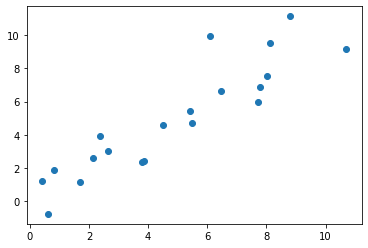

In [81]:
# 创建
x = np.linspace(0, 10, 20) + np.random.randn(20)
y = np.linspace(0, 10, 20) + np.random.randn(20)
plt.scatter(x, y)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
linear = LinearRegression()
linear.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
linear.coef_

array([0.98080784])

In [85]:
linear.intercept_

0.18804668820748205

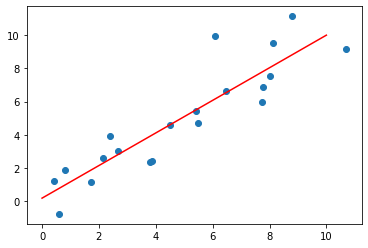

In [86]:
plt.scatter(x, y)
x_test = np.linspace(0, 10, 30)
y_test = linear.coef_[0] * x_test + linear.intercept_
plt.plot(x_test, y_test, c='r')

In [87]:
# 参数初始化
W = tf.Variable(np.random.randn() * 0.01)
B = tf.Variable(0.)

In [88]:
# 定义预测函数
def linear_regression(x):
    return W * x + B

In [89]:
# 定义损失函数
# 最小二乘法
def mean_square_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [90]:
# 定义优化器
optimizer = tf.optimizers.SGD()

In [91]:
# 定义优化过程
def run_optimization():
    # tensorflow通过梯度带(GradientTape)去跟踪变量的梯度, 实现自动微分. 
    with tf.GradientTape() as g:
        pred = linear_regression(x)
        loss = mean_square_loss(pred, y)
    
    # 计算梯度
    gradients = g.gradient(loss, [W, B])
    
    # 更新梯度
    optimizer.apply_gradients(zip(gradients, [W, B]))

In [93]:
# 训练过程
epochs = 5000
for epoch in range(epochs):
    run_optimization()
    
    if epoch % 100 == 0:
        pred = linear_regression(x)
        loss = mean_square_loss(pred, y)
        print(f'step: {epoch + 1}, loss: {loss}, W: {W.numpy()}, B:{B.numpy()}')

step: 1, loss: 2.405714273452759, W: 0.8760782480239868, B:0.13314484059810638
step: 101, loss: 1.9896347522735596, W: 0.984198272228241, B:0.1655721515417099
step: 201, loss: 1.9895451068878174, W: 0.9828008413314819, B:0.17483532428741455
step: 301, loss: 1.9895139932632446, W: 0.9819793701171875, B:0.18028059601783752
step: 401, loss: 1.9895036220550537, W: 0.9814965128898621, B:0.18348146975040436
step: 501, loss: 1.9895000457763672, W: 0.9812126755714417, B:0.18536308407783508
step: 601, loss: 1.9894987344741821, W: 0.9810458421707153, B:0.186469167470932
step: 701, loss: 1.9894983768463135, W: 0.9809476733207703, B:0.18711943924427032
step: 801, loss: 1.9894979000091553, W: 0.9808900356292725, B:0.18750162422657013
step: 901, loss: 1.9894979000091553, W: 0.98085618019104, B:0.18772631883621216
step: 1001, loss: 1.9894981384277344, W: 0.9808362722396851, B:0.18785835802555084
step: 1101, loss: 1.9894981384277344, W: 0.9808245301246643, B:0.18793600797653198
step: 1201, loss: 1.989

In [94]:
W.numpy()

0.9808082

In [95]:
B.numpy()

0.18804461

In [96]:
linear.coef_

array([0.98080784])

In [97]:
linear.intercept_

0.18804668820748205